In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, "../") 

from importlib import reload
from tblib import lattice
from tblib import hamiltonian
from tblib import plotting
from tblib import sc_AHM

reload(lattice)
reload(hamiltonian)
reload(plotting)
reload(sc_AHM)

<module 'tblib.sc_AHM' from 'c:\\Users\\atsch\\Desktop\\MasterVorlesungen\\Masterthesis\\Code\\tests\\..\\tblib\\sc_AHM.py'>

# Test of self consistency
- selfconsistent calculation of meanfield cooper and hatree-fock channels
- plots show evolution of those for each site group (dDSL), filling factor $\nu$ and chemical potential $\mu$
- Band structure and DOS shown for additional verification

In [9]:
N=3
m = -0.5
n = N**2-N+1
lat = lattice.dDiagonallyStripedLattice(N=N)
ham = hamiltonian.dDSLmodel(N=N, delta=np.ones(n), T=0.0000, U=np.ones(n)*1, nu=n, ns=np.ones(n), mu=np.ones(n)*m)
#lat = lattice.SquareLattice()
#ham = hamiltonian.SquareLatticeModel(delta=np.ones(n), T=0.0000, U=np.ones(n)*1, nu=n, ns=np.ones(n), mu=np.ones(n)*m)

In [4]:
sc_AHM.get_mean_fields(ham, 41, HF=True)

([(0.3326657751361599+2.9292991230289606e-19j),
  (0.3326657751361599+1.066606461290906e-18j),
  (0.25577368882346124+3.033623599018817e-18j),
  (0.33266577513616036+1.0189017606551292e-20j),
  (0.33266577513616036+5.979720042627146e-19j)],
 [(0.9999999999999977+0j),
  (0.9999999999999976+0j),
  (1.0000000000000002+0j),
  (1+0j),
  (1.0000000000000002+0j)])

In [5]:
dels, nus, mus = sc_AHM.self_consistency_loop(ham, 41, HF=True, Nmax=300, alpha=0.3, g=1e-4)

In [6]:
dels

array([[1.        +0.00000000e+00j, 0.53286604+2.05050939e-19j,
        0.32480605+2.87123183e-19j, 0.21644832+2.20286444e-19j,
        0.15452629-7.08300289e-19j, 0.11682124-6.85169187e-20j,
        0.09270774-4.79933122e-19j, 0.07665176-4.58461304e-19j,
        0.06559093+1.40775134e-20j, 0.05774758-2.81164871e-19j,
        0.0520472 -2.19292523e-19j, 0.04781702+9.37397710e-19j,
        0.04462217+7.08529441e-19j, 0.04217346+5.64610750e-19j,
        0.04027344-2.32792755e-19j, 0.03878403+5.21439665e-19j,
        0.03760661+6.23476308e-19j, 0.0366693 -6.94341323e-19j,
        0.03591883+5.54544454e-19j, 0.0353151 +1.25352215e-18j,
        0.03482752-5.39231499e-20j, 0.03443248+1.70999745e-19j,
        0.03411157+3.90110511e-19j, 0.03385031-8.07281073e-19j,
        0.03363723-7.61483024e-19j, 0.03346319+1.28026393e-20j,
        0.03332087+2.86247951e-19j, 0.03320437+7.31897196e-19j,
        0.03310893+8.57172588e-20j],
       [1.        +0.00000000e+00j, 0.53286604+7.46624523e-19j,
   

C:\Users\atsch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


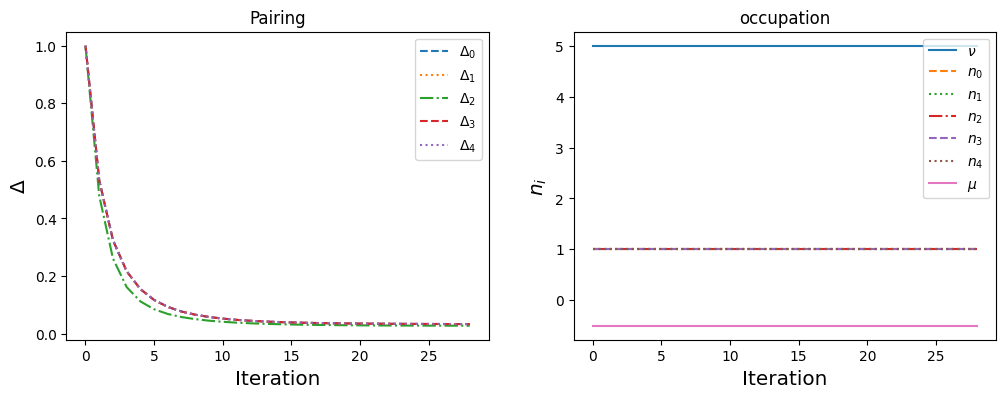

In [7]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
axes[0].set_title('Pairing')
axes[1].set_title('occupation')

axes[0].set_xlabel('Iteration', size='x-large')
axes[0].set_ylabel(r'$\Delta$', size='x-large')
#axes[0].set_xticks(size='x-large')
#axes[0].set_yticks(size='x-large')

axes[1].set_xlabel('Iteration', size='x-large')
axes[1].set_ylabel(r'$n_i$', size='x-large')
#axes[1].set_xticks(size='x-large')
#axes[1].set_yticks(size='x-large')

colors=['dashed', 'dotted', 'dashdot']

for i,d in enumerate(dels):
    ax0 = axes[0].plot(np.arange(len(dels[0])), np.real(d), linestyle=colors[i%3], label = f'$\Delta_{i}$')

s1 = np.sum(nus, axis=0)

axes[1].plot(np.arange(len(s1)), s1, label = r'$\nu$')
for i,n in enumerate(nus):
    ax1 = axes[1].plot(np.arange(len(s1)),nus[i],linestyle=colors[i%3], label=f'$n_{i}$')
axes[1].plot(np.arange(len(s1)),mus[0], label=r'$\mu$')

   
axes[0].legend()
axes[1].legend()
plt.show()

In [107]:
ham.lat.nn

{(0, 0): {(0, 0): [(1, 0), (0, 1), (-1, 0), (0, -1)]}}

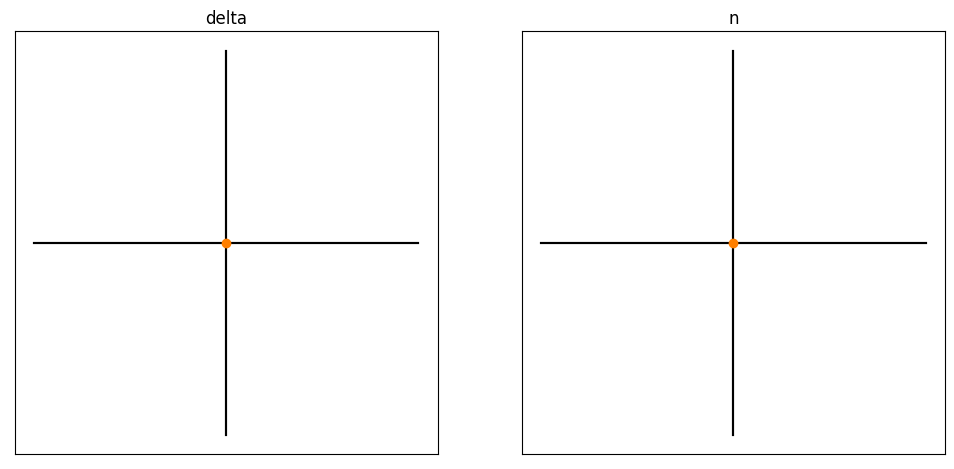

In [19]:
fig, axes = plt.subplots(ncols = 2, figsize=(12,9))

lattices = [lattice.DiagonallyStripedLattice(N=N)]

labels = [f'delta', f'n']
props = [ham.delta, ham.ns]

g = []
for i, lats in enumerate(lattices):
    for j, p in enumerate(props):
        
        field = p#ham.lat.striped_props(p)#[p[ham.lat.map_diag[i]] for i in range(ham.n)]
        s = lat.plot_nn(axes[j], field=np.real(field), cmap='autumn')
        axes[j].set_title(labels[j])




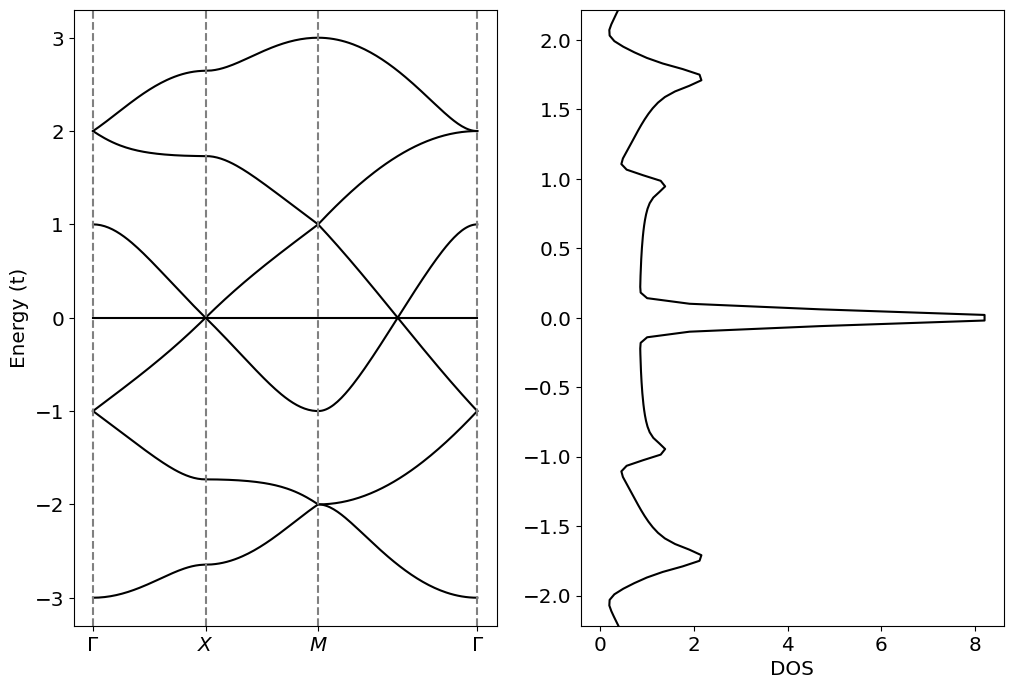

In [10]:
H = ham.get_H0()

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,8))
# Create two subplots and unpack the output array immediately

axes[0] = plotting.plot_bands(H, hsp_path='GXMG', ax=axes[0])
axes[1] = plotting.plot_DOS(H, sig=0.05, elim = (-4, 4), ax=axes[1], ylabel=None)

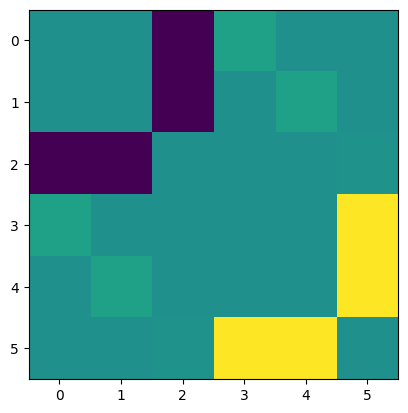

In [10]:
H = ham.get_reducedH()
plt.imshow(np.real(H(0.7,0.7)))

In [11]:
delarr = []
Uarr = np.arange(0,10,0.5)
for U in Uarr:
    m = -U/2
    ham = hamiltonian.dDSLmodel(N=N, delta=[1,1,1], T=0, U=[U,U,U], nu=3, ns=[1,1,1], mu=[m,m,m])
    dels, nus, mus = sc_AHM.self_consistency_loop(ham, 41, HF=True, Nmax=200)
    delarr.append(dels[:,-1])

KeyboardInterrupt: 

In [12]:
ham.n

3

IndexError: list index out of range

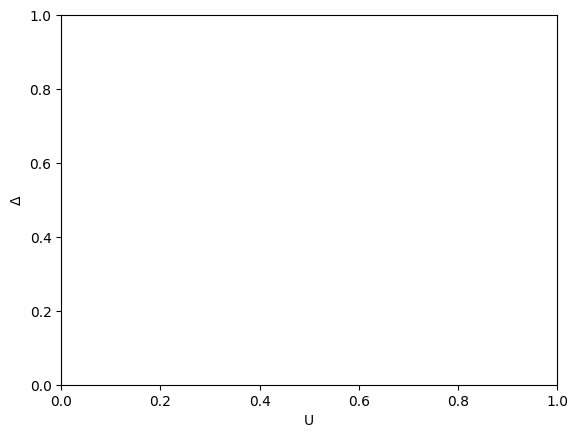

In [ ]:
plt.xlabel('U')
plt.ylabel(r'$\Delta$')
plt.plot(Uarr, [delarr[i]*U for i,U in enumerate(Uarr)], label=[r'$\Delta_B$', r'$\Delta_{A/C}$'])
plt.legend()